##<br> <center> MVA 2024 - Time Series </center>

##<br> <center> TP 1 </center>
<br> <center> Samar Rabeh </center>
<br> <center> Hayder Hajlaoui  </center>

# Setup

In [3]:
!pip install loadmydata
!pip install numpy

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for loadmydata: filename=loadmydata-0.0.11-py3-none-any.whl size=18020 sha256=c140c7d5c7e7317097ef787faf7853a6a531433824afc01dec6d56bdb1838ed6
  Stored in directory: /root/.cache/pip/wheels/43/16/85/7c6a4152d2b99f1e83db216f6a0e8116700f0f03cc555f2c7c
Successfully built loadmydata


**Imports**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier

**Utility functions**

In [6]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

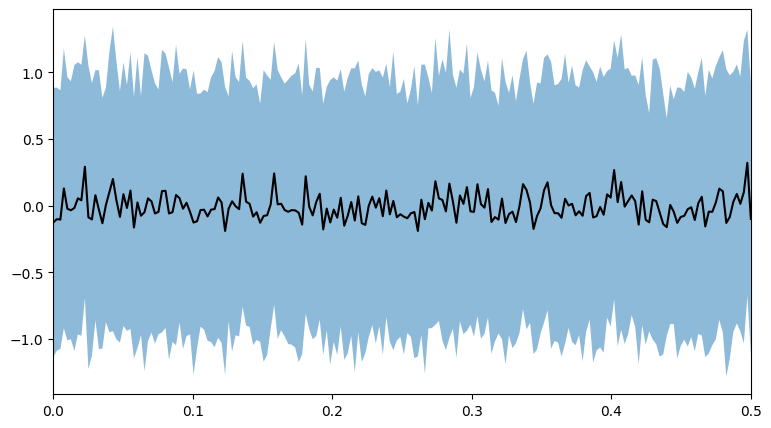

In [7]:
# This is an example of plot (random data). You can change it if you want.

## Change the following lines
periodograms = np.random.randn(100, 200)  # shape (n_trials, n_freqs)
freqs = np.linspace(0, 0.5, 200)
##


fig, ax = fig_ax(figsize=(9, 5))

avg = periodograms.mean(axis=0)
std = periodograms.std(axis=0)
ax.plot(freqs, avg, 'k-')
ax.fill_between(freqs, avg-std, avg+std, alpha=0.5)


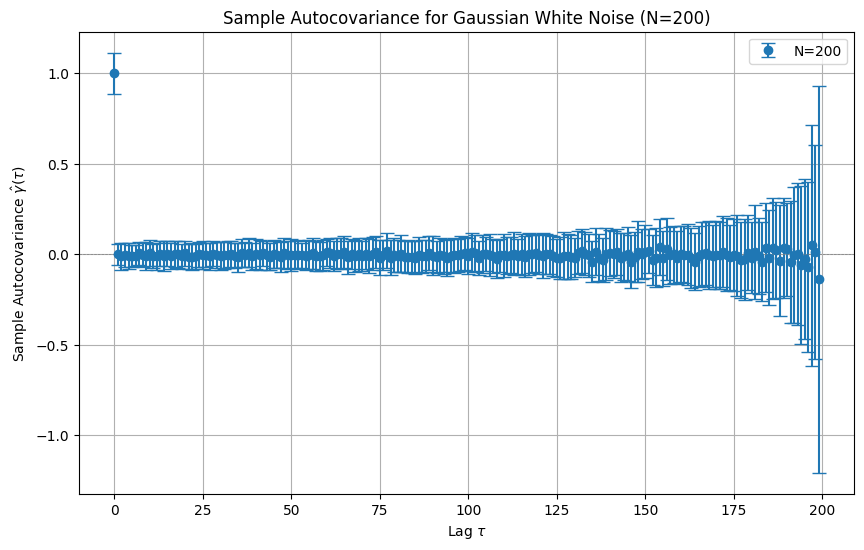

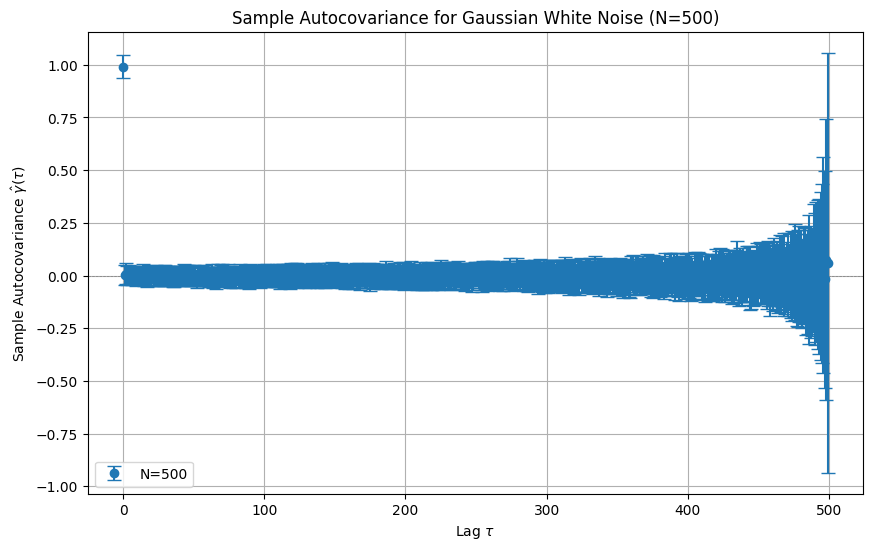

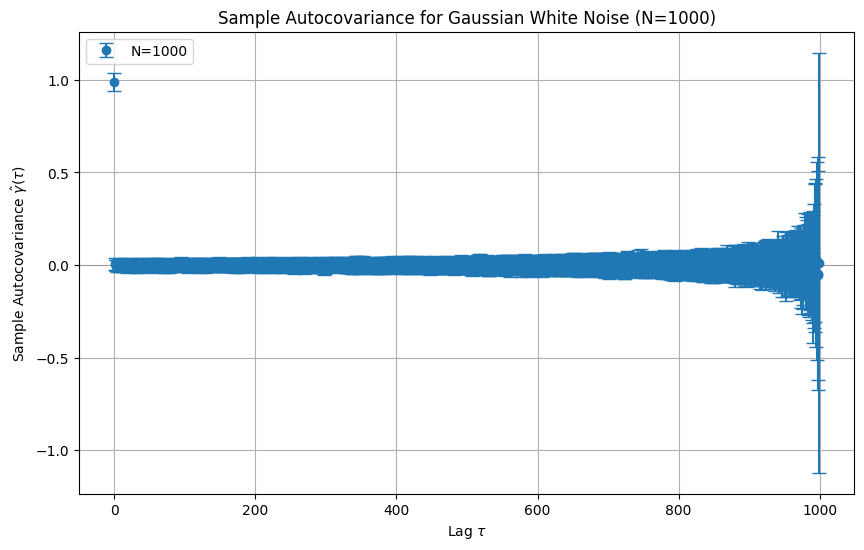

In [13]:
# Parameters
sigma = 1
N_values = [200, 500, 1000]
simulations = 100

def sample_autocovariance(data, max_lag):
    N = len(data)
    mean = np.mean(data)
    autocovariances = []
    for lag in range(max_lag):
        # autocovariance at each lag
        cov = np.sum((data[:N - lag] - mean) * (data[lag:] - mean)) / (N - lag)
        autocovariances.append(cov)
    return autocovariances

for N in N_values:
    all_autocovs = []
    # simulations
    for simul in range(simulations):
        X = np.random.normal(0, np.sqrt(sigma), N)
        autocovariances = sample_autocovariance(X, N)
        all_autocovs.append(autocovariances)
    all_autocovs = np.array(all_autocovs)
    mean_autocov = np.mean(all_autocovs, axis=0)
    std_autocov = np.std(all_autocovs, axis=0)
    # Plots
    plt.figure(figsize=(10, 6))
    plt.errorbar(range(N), mean_autocov, yerr=std_autocov, fmt='o', capsize=5, label=f'N={N}')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.xlabel(r'Lag $\tau$')
    plt.ylabel(r'Sample Autocovariance $\hat{\gamma}(\tau)$')
    plt.title(f'Sample Autocovariance for Gaussian White Noise (N={N})')
    plt.legend()
    plt.grid()
    plt.show()

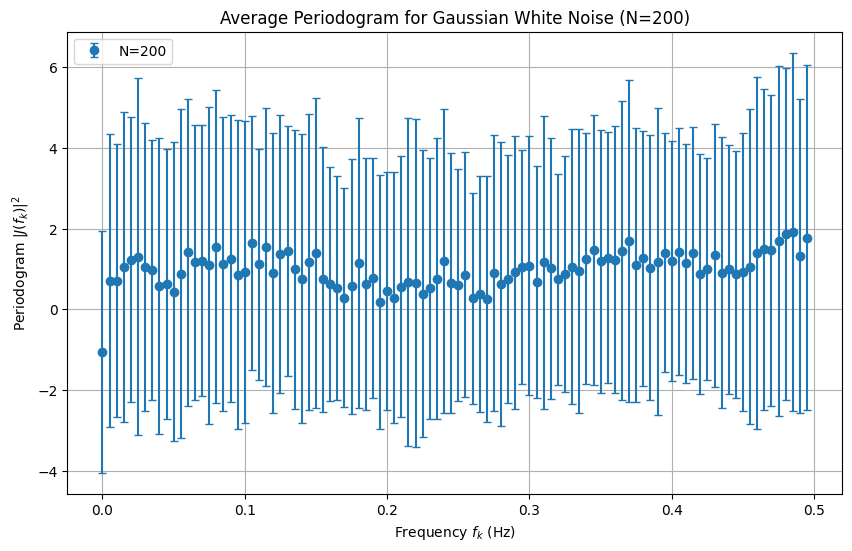

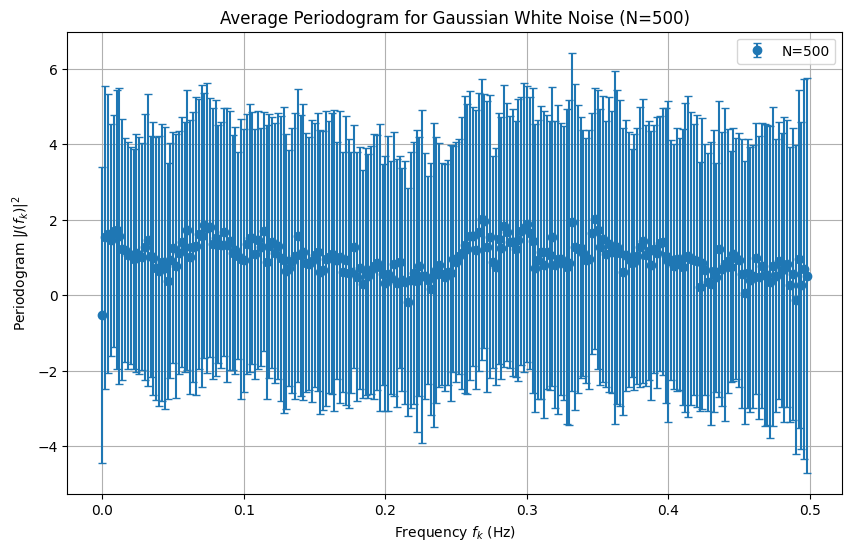

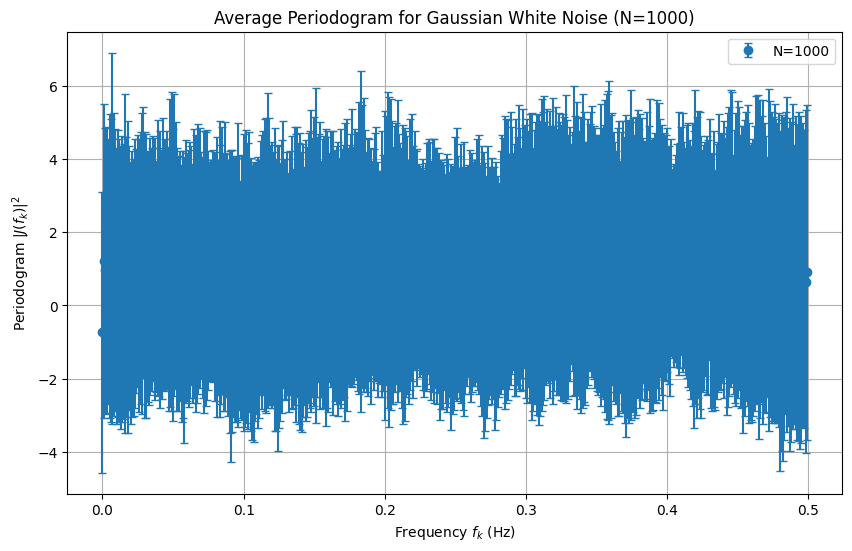

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1
simulations = 100
N_values = [200, 500, 1000]

# periodogram for a single simulation
def periodogram(X):
    N = len(X)
    frequencies = np.fft.fftfreq(N, d=1/fs)
    I=[]
    autocovariances=sample_autocovariance(X, N)
    for k in range (N // 2):
      sum=0
      for tau in range(1,N):
        sum+=autocovariances[tau]*np.exp(-2j * np.pi * k * tau / N)
        sum+=autocovariances[tau]*np.exp(-2j * np.pi * k * (-tau / N))
      sum+=autocovariances[0]
      I.append(sum)

    return frequencies[:N // 2], I

for N in N_values:
    all_periodograms = []
    for simul in range(simulations):
        X = np.random.normal(0, 1, N)
        f, I = periodogram(X)
        all_periodograms.append(I)
    all_periodograms = np.array(all_periodograms)
    mean_periodogram = np.mean(all_periodograms, axis=0)
    std_periodogram = np.std(all_periodograms, axis=0)

    plt.figure(figsize=(10, 6))
    plt.errorbar(f, mean_periodogram, yerr=std_periodogram, fmt='o', capsize=3, label=f'N={N}')
    plt.xlabel(r'Frequency $f_k$ (Hz)')
    plt.ylabel(r'Periodogram $|J(f_k)|^2$')
    plt.title(f'Average Periodogram for Gaussian White Noise (N={N})')
    plt.legend()
    plt.grid()
    plt.show()

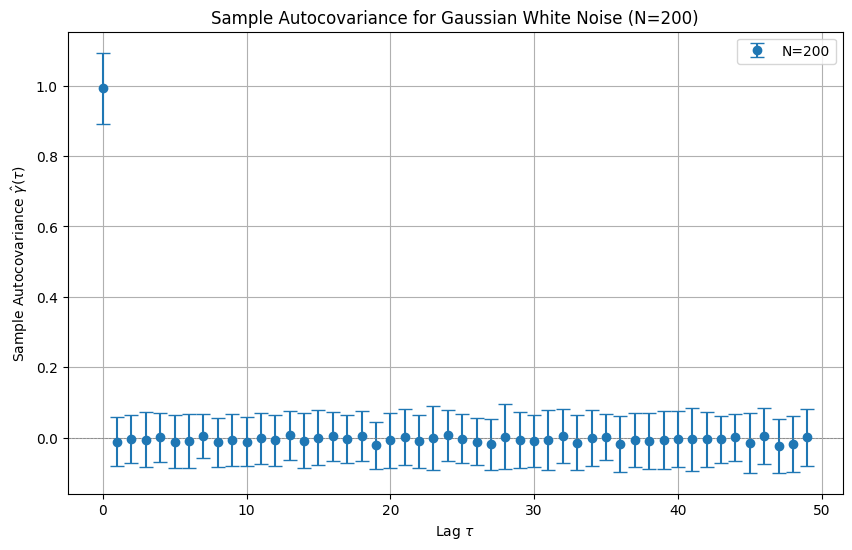

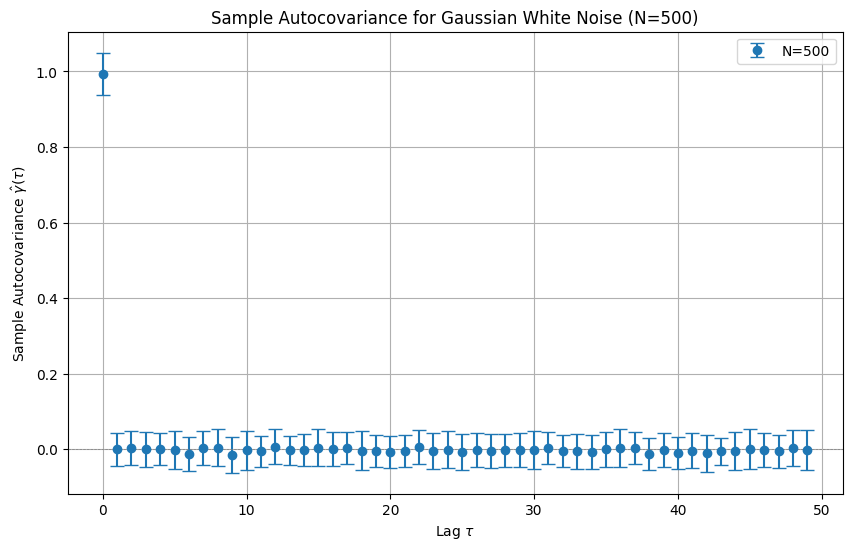

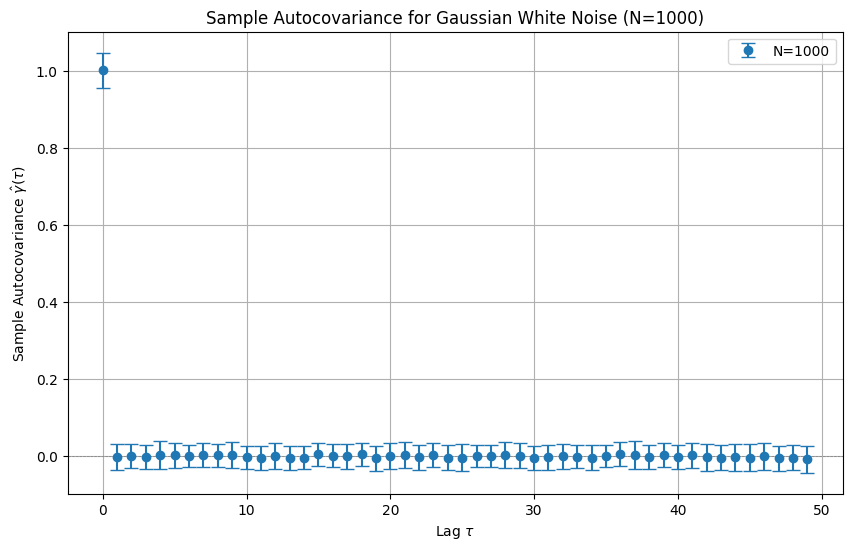

## Question 9

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


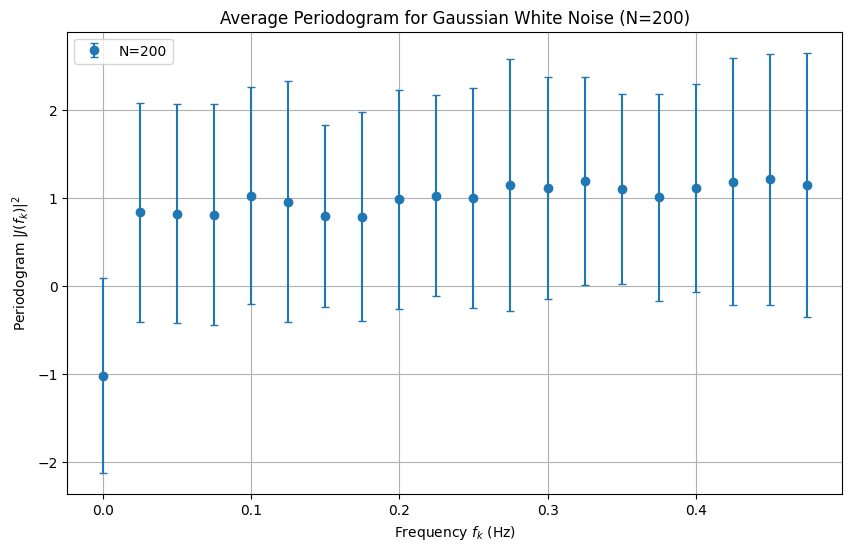

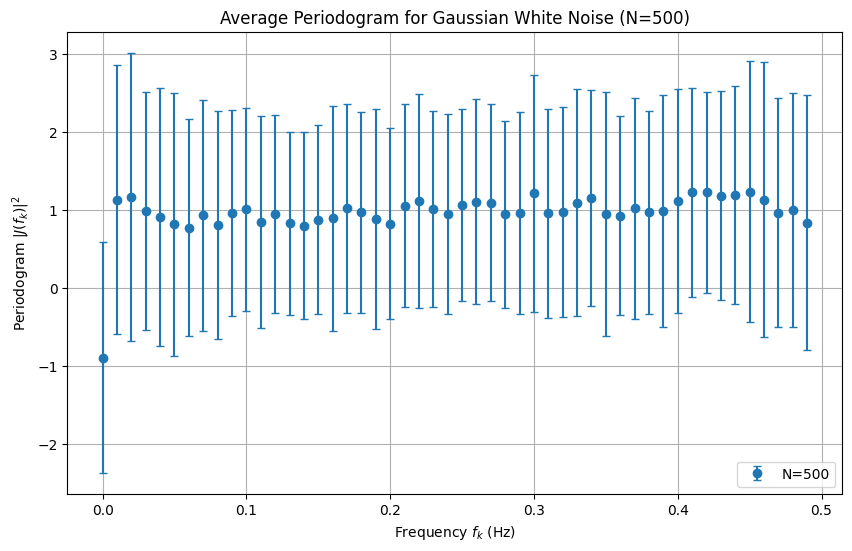

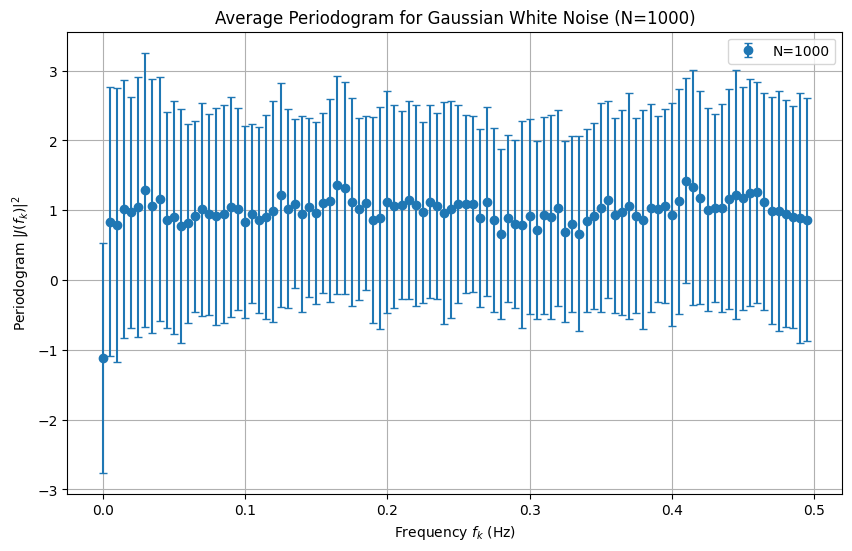

In [29]:
  for N in N_values:
    all_periodograms = []
    for simul in range(simulations):
        X = np.random.normal(0, 1, N)
        I_avg = np.zeros(N // 10,dtype=complex)
        for k in range(5):
          f, I = periodogram(X[k*N//5:(k+1)*N//5])
          I_avg += [x/5 for x in I]
        all_periodograms.append(I_avg)
    all_periodograms = np.array(all_periodograms)
    mean_periodogram = np.mean(all_periodograms, axis=0)
    std_periodogram = np.std(all_periodograms, axis=0)

    plt.figure(figsize=(10, 6))
    plt.errorbar(f, mean_periodogram, yerr=std_periodogram, fmt='o', capsize=3, label=f'N={N}')
    plt.xlabel(r'Frequency $f_k$ (Hz)')
    plt.ylabel(r'Periodogram $|J(f_k)|^2$')
    plt.title(f'Average Periodogram for Gaussian White Noise (N={N})')
    plt.legend()
    plt.grid()
    plt.show()

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [ ]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)


X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

100%|██████████| 202M/202M [01:21<00:00, 2.47MiB/s]


## Question 10

In [ ]:
!pip install dtw-python

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import numpy as np


def get_dtw_distance(signal_1: np.ndarray, signal_2: np.ndarray) -> float:
    return dtw(signal_1,signal_2).distance

def pad_sequences(sequences, pad_value=-1):
    max_len = max(map(len, sequences))
    return np.array([np.pad(seq, (0, max_len - len(seq)), 'constant', constant_values=pad_value) for seq in sequences])

# Prepare data
X_train_padded = pad_sequences(X_train)
X_tr, X_te, y_tr, y_te = train_test_split(X_train_padded, y_train, test_size=0.25, random_state=42)

# Hyperparameter tuning for KNeighborsClassifier with DTW metric
clf = KNeighborsClassifier(weights='distance', metric=get_dtw_distance)
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=make_scorer(f1_score))
grid_search.fit(X_tr, y_tr)

# Results from Grid Search
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_f1_score_train = grid_search.best_score_
print(f'Best number of neighbors: {best_n_neighbors}')
print(f'Best average f1-score on training set: {best_f1_score_train:.2f}')

# Train and evaluate the best model on the test set
clf_best = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights='distance', metric=get_dtw_distance)
clf_best.fit(X_tr, y_tr)
y_pred = clf_best.predict(X_te)
f1_test = f1_score(y_te, y_pred)
print(f'F1-score on test set: {f1_test:.2f}')


Best number of neighbors: 5
Best average f1-score on training set: 0.86
F1-score on test set: 0.83


## Question 11

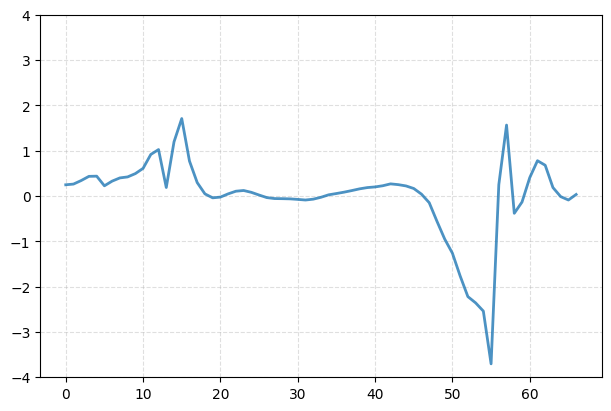

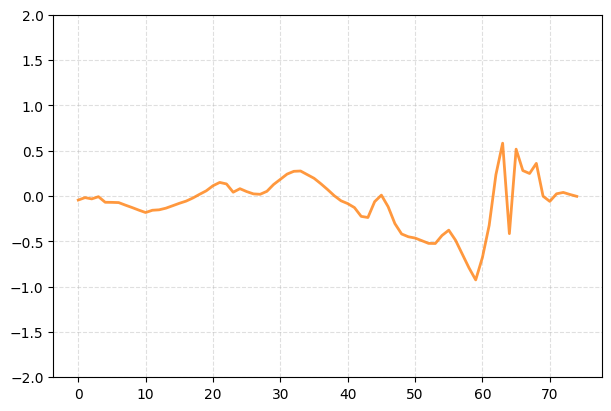

In [ ]:

# Identify indices and corresponding true classes of incorrectly classified samples
incorrect_indices = np.where(y_pred != y_te)[0]
incorrect_classes = np.array(y_te)[incorrect_indices]

# Retrieve a misclassified step from the 'Healthy' class
healthy_misclassified_index = np.where(incorrect_classes == 0)[0][0]
misclassified_healthy = X_te[incorrect_indices[healthy_misclassified_index]]
misclassified_healthy = misclassified_healthy[misclassified_healthy != -1]

# Retrieve a misclassified step from the 'Non-Healthy' class
non_healthy_misclassified_index = np.where(incorrect_classes == 1)[0][0]
misclassified_non_healthy = X_te[incorrect_indices[non_healthy_misclassified_index]]
misclassified_non_healthy = misclassified_non_healthy[misclassified_non_healthy != -1]

# Plot the 'Healthy' case misclassified as 'Non-Healthy' in a normal-sized figure
fig1, ax1 = plt.subplots(figsize=(6, 4), constrained_layout=True)
ax1.plot(misclassified_healthy, color='#1f77b4', linewidth=2, alpha=0.8)
#ax1.set_title('Healthy Case Predicted as Non-Healthy', fontsize=14, weight='bold')
ax1.grid(True, linestyle='--', alpha=0.4)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_ylim(-4, 4)  # Adjust based on signal values

# Show first figure
plt.show()

# Plot the 'Non-Healthy' case misclassified as 'Healthy' in a normal-sized figure
fig2, ax2 = plt.subplots(figsize=(6, 4), constrained_layout=True)
ax2.plot(misclassified_non_healthy, color='#ff7f0e', linewidth=2, alpha=0.8)
#ax2.set_title('Non-Healthy Case Predicted as Healthy', fontsize=14, weight='bold')
ax2.grid(True, linestyle='--', alpha=0.4)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_ylim(-2, 2)  # Adjust based on signal values

# Show second figure
plt.show()

